# Classification trees

In [48]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/trist/Documents/Cours/L3_MIASHS/Compléments_maths/S2/Projet/spotifyMusicGenresClean.csv")
df.head()

,genre,danceability,duration_ms,instrumentalness,key,liveness,speechiness,tempo,mode,valence
0,Rock,0.626561,0.418905,0.003211,10,0.031140,0.064748,0.384348,0,0.173305
1,Rock,0.303303,0.241046,0.000000,1,0.084078,0.107696,0.639850,1,0.215285
2,Rock,0.506360,0.312728,0.000080,0,0.077308,0.068672,0.589810,1,0.228202
3,Rock,0.452678,0.416564,0.006166,1,0.061197,0.023763,0.729532,1,0.589882
4,Rock,0.691913,0.111424,0.000000,8,0.122665,0.074559,0.413965,1,0.822390


In [49]:
y = df.genre.values

categorical_variables = ["mode", "key"]
quantitative_variables = ["danceability","duration_ms","instrumentalness","liveness","speechiness","tempo","valence"]

X = df[categorical_variables + quantitative_variables].values
X_quantitative = df[quantitative_variables].values
X_categorical = df[categorical_variables].values
features = ["danceability","duration_ms","instrumentalness","liveness","speechiness","tempo","valence","mode","key"]
target = ["Classical", "Country", "EDM", "Rap", "Rock"]

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
classifier = DecisionTreeClassifier(max_depth= 15, max_features= 'sqrt', min_samples_leaf= 4, min_samples_split= 10)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)
print("======= Results")
print(classification_report(y_test, y_pred))

Accuracy : 0.4084507042253521
======= Results
              precision    recall  f1-score   support

   Classical       0.69      0.73      0.71        15
     Country       0.42      0.33      0.37        15
         EDM       0.39      0.47      0.42        15
         Rap       0.30      0.27      0.29        11
        Rock       0.20      0.20      0.20        15

    accuracy                           0.41        71
   macro avg       0.40      0.40      0.40        71
weighted avg       0.40      0.41      0.40        71



In [31]:
# On essaie avec le critère de split de l'enthropie

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# On spécifie ici le critère 'entropy' car gini est le critère par défaut
classifier2 = DecisionTreeClassifier(criterion = "entropy")
classifier2.fit(X_train, y_train)
y_pred = classifier2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)
print("======= Results")
print(classification_report(y_test, y_pred))

Accuracy : 0.4507042253521127
======= Results
              precision    recall  f1-score   support

   Classical       1.00      0.93      0.97        15
     Country       0.37      0.47      0.41        15
         EDM       0.36      0.27      0.31        15
         Rap       0.18      0.18      0.18        11
        Rock       0.31      0.33      0.32        15

    accuracy                           0.45        71
   macro avg       0.45      0.44      0.44        71
weighted avg       0.46      0.45      0.45        71



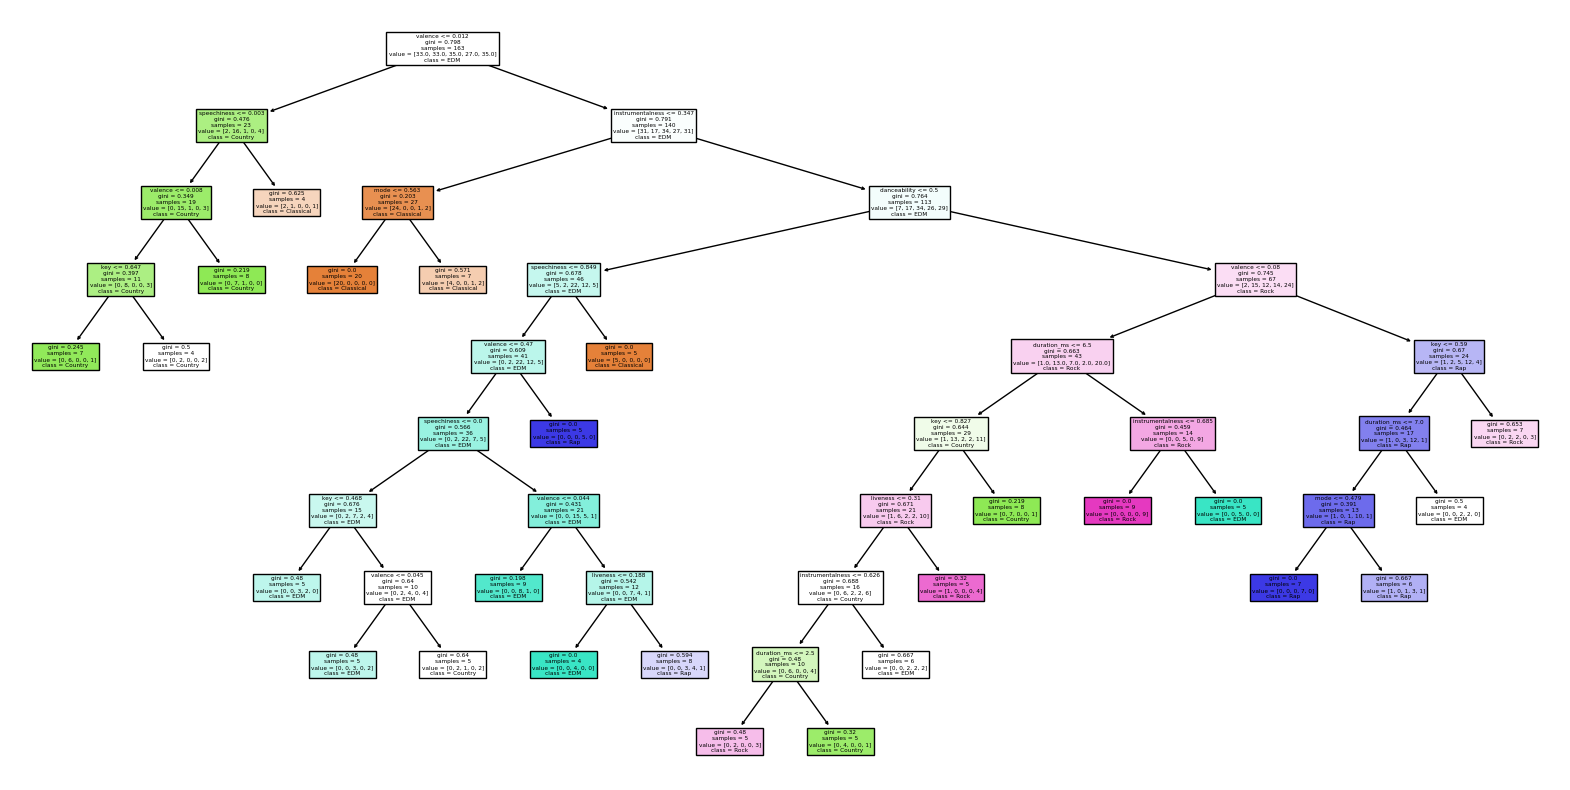

In [55]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(classifier, filled=True, feature_names=features, class_names=target)
plt.show()

## Random forests

In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Meilleurs hyperparamètres:", grid_search.best_params_)

C:\Users\trist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\trist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\trist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\bas

Meilleurs hyperparamètres: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Créer une instance de RandomForestClassifier
rf_classifier = RandomForestClassifier(max_features = 'log2', min_samples_leaf = 4, n_estimators=200)

# Entraîner le modèle sur les données d'entraînement
rf_classifier.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = rf_classifier.predict(X_test)

# Calculer l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("======= Results")
print(classification_report(y_test, y_pred))

Accuracy: 0.6619718309859155
======= Results
              precision    recall  f1-score   support

   Classical       0.93      0.93      0.93        15
     Country       0.59      0.67      0.62        15
         EDM       0.64      0.60      0.62        15
         Rap       0.64      0.82      0.72        11
        Rock       0.45      0.33      0.38        15

    accuracy                           0.66        71
   macro avg       0.65      0.67      0.66        71
weighted avg       0.65      0.66      0.65        71

